# Create a manual model with PyTorch

In [1]:
import os

from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch, numpy as np, pandas as pd

In [3]:
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [190]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [191]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [192]:
df.shape

(891, 12)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [195]:
df.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [196]:
df.mean()

/tmp/ipykernel_137/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [197]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [198]:
# Fill NaNs with mode
df.fillna(value=modes, inplace=True)

In [199]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [200]:
import numpy as np
df.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

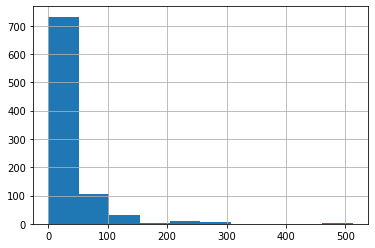

In [201]:
df['Fare'].hist()

<AxesSubplot:>

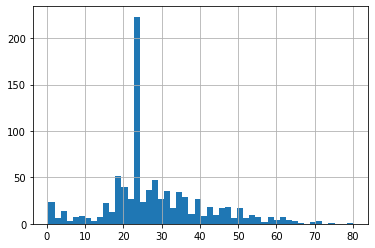

In [202]:
df['Age'].hist(bins=50)

In [203]:
df['LogFare'] = np.log1p(df['Fare'])
# df['LogFare'] = np.log(df['Fare']+1)

<AxesSubplot:>

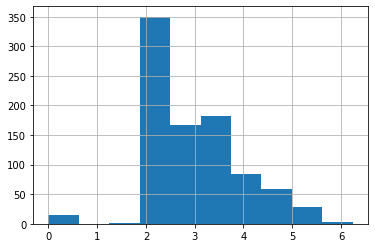

In [204]:
df['LogFare'].hist()

In [205]:
# df['Age'] = np.log1p(df['Age'])

<AxesSubplot:>

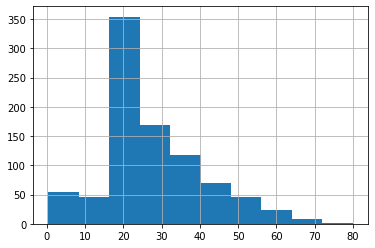

In [206]:
df['Age'].hist()

In [207]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [208]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [209]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [210]:
pclasses = sorted(df['Pclass'].unique())
pclasses

[1, 2, 3]

In [211]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [212]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   LogFare      891 non-null    float64
 10  Sex_female   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
 12  Pclass_1     891 non-null    uint8  
 13  Pclass_2     891 non-null    uint8  
 14  Pclass_3     891 non-null    uint8  
 15  Embarked_C   891 non-null    uint8  
 16  Embarked_Q   891 non-null    uint8  
 17  Embarked_S   891 non-null    uint8  
dtypes: float64(3), int64(4), object(3), uint8(8)
memor

In [214]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [215]:
added_cols = ['Sex_female', 'Sex_male', 'Pclass_1','Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [216]:
df[added_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1


In [217]:
from torch import tensor

t_dep = tensor(df['Survived'])

In [218]:
# t_dep

In [219]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [220]:
t_indep.shape

torch.Size([891, 12])

In [221]:
torch.manual_seed(442)

In [222]:
n_coeff = t_indep.shape[1]
n_coeff

12

In [223]:
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [224]:
t_indep*coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.0000,  -0.3147,   0.0000

In [225]:
# Normalize
vals,indices = t_indep.max(dim=0)
vals

tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000])

In [226]:
indices

tensor([630, 159, 678, 258,   1,   0,   1,   9,   0,   1,   5,   0])

In [227]:
t_indep = t_indep / vals

In [228]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [229]:
# Get predictions
preds = (t_indep*coeffs).sum(axis=1)

In [230]:
preds[:10]

tensor([ 0.1412, -0.5725,  0.1494,  0.2571,  0.0453, -0.0448,  0.0792,  0.2961,  0.2128, -0.5770])

array([[<AxesSubplot:title={'center':'logits'}>]], dtype=object)

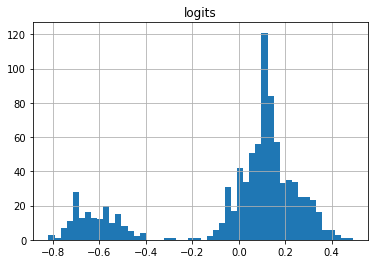

In [231]:
df_logits = pd.DataFrame({'logits':preds.tolist()})
df_logits.hist(bins=50)

In [232]:
# Mean Absolute Error (MAE)
np.mean([1, 2, 3.])
np.mean(abs(preds - df['Survived']))

0.5200338111949957

In [233]:
preds[:10]

tensor([ 0.1412, -0.5725,  0.1494,  0.2571,  0.0453, -0.0448,  0.0792,  0.2961,  0.2128, -0.5770])

In [234]:
t_dep[:10]

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [235]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5200)

In [236]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)- deps).mean()

## Gradient Descent

In [237]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [238]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5200, grad_fn=<MeanBackward0>)

In [239]:
# Calculate gradients on loss function
loss.backward()

In [240]:
coeffs.grad

tensor([-0.0483,  0.0118, -0.0041, -0.0804, -0.1975,  0.1111, -0.1235, -0.0426,  0.0797, -0.1886, -0.0617,  0.1639])

In [241]:
# Gradients are not being reset to zero and grow each time this code is run
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0967,  0.0236, -0.0082, -0.1608, -0.3951,  0.2222, -0.2469, -0.0853,  0.1594, -0.3771, -0.1235,  0.3277])

In [242]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4809)


## Training

In [243]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [244]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [245]:
trn_indep.shape

torch.Size([713, 12])

In [246]:
trn_dep.shape

torch.Size([713])

In [247]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [248]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [249]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [250]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [251]:
coeffs = train_model(epochs=18, lr=0.2)

0.518; 0.491; 0.468; 0.445; 0.422; 0.400; 0.378; 0.358; 0.340; 0.327; 0.315; 0.306; 0.308; 0.311; 0.311; 0.292; 0.296; 0.287; 

In [252]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))

In [253]:
show_coeffs()

{'Age': tensor(-0.2581),
 'SibSp': tensor(0.0894),
 'Parch': tensor(0.2346),
 'LogFare': tensor(0.0275),
 'Sex_female': tensor(0.2574),
 'Sex_male': tensor(-0.4129),
 'Pclass_1': tensor(0.7098),
 'Pclass_2': tensor(0.4246),
 'Pclass_3': tensor(0.3691),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2490),
 'Embarked_S': tensor(0.2116)}

## Measuring accuracy

In [254]:
# Note that the accuracy can be used for gradient descent

In [255]:
coeffs*val_indep

tensor([[-0.0774,  0.0000,  0.0000,  0.0114,  0.2574, -0.0000,  0.0000,  0.4246,  0.0000,  0.0000,  0.2490,  0.0000],
        [-0.0774,  0.0000,  0.0000,  0.0096,  0.0000, -0.4129,  0.0000,  0.0000,  0.3691,  0.0000,  0.2490,  0.0000],
        [-0.0774,  0.0000,  0.0000,  0.0093,  0.0000, -0.4129,  0.0000,  0.0000,  0.3691,  0.0955,  0.0000,  0.0000],
        [-0.0581,  0.0000,  0.0000,  0.0190,  0.0000, -0.4129,  0.0000,  0.4246,  0.0000,  0.0000,  0.0000,  0.2116],
        [-0.0807,  0.0000,  0.0000,  0.0116,  0.0000, -0.4129,  0.0000,  0.4246,  0.0000,  0.0000,  0.0000,  0.2116],
        [-0.1097,  0.0112,  0.0000,  0.0136,  0.0000, -0.4129,  0.0000,  0.4246,  0.0000,  0.0000,  0.0000,  0.2116],
        [-0.0129,  0.0000,  0.0391,  0.0118,  0.2574, -0.0000,  0.0000,  0.0000,  0.3691,  0.0955,  0.0000,  0.0000],
        ...,
        [-0.0613,  0.0000,  0.0000,  0.0121,  0.0000, -0.4129,  0.0000,  0.0000,  0.3691,  0.0000,  0.0000,  0.2116],
        [-0.0710,  0.0112,  0.0000,  0.0186

In [256]:
preds = calc_preds(coeffs=coeffs, indeps=val_indep)

In [257]:
results = val_dep.bool() == (preds > 0.5)
results.sum()/len(val_dep)

tensor(0.7978)

In [258]:
results.float().mean()

tensor(0.7978)

In [259]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7978)

## Using a squishing function (Sigmoid)

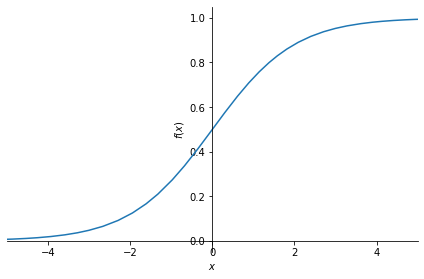

In [260]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [261]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

Train a new model

In [262]:
coeffs = train_model(epochs=30, lr=10)

0.503; 0.347; 0.307; 0.279; 0.263; 0.252; 0.246; 0.241; 0.237; 0.234; 0.231; 0.229; 0.228; 0.226; 0.225; 0.224; 0.223; 0.222; 0.221; 0.221; 0.220; 0.219; 0.219; 0.218; 0.217; 0.217; 0.216; 0.216; 0.215; 0.215; 

In [263]:
acc(coeffs)

tensor(0.8315)

In [264]:
show_coeffs()

{'Age': tensor(-0.8279),
 'SibSp': tensor(-0.3732),
 'Parch': tensor(-0.0034),
 'LogFare': tensor(0.0696),
 'Sex_female': tensor(3.1551),
 'Sex_male': tensor(-4.0007),
 'Pclass_1': tensor(1.5497),
 'Pclass_2': tensor(1.1096),
 'Pclass_3': tensor(-1.8459),
 'Embarked_C': tensor(0.2521),
 'Embarked_Q': tensor(0.6972),
 'Embarked_S': tensor(-1.0834)}

## Submitting to kaggle

In [265]:
tst_df = pd.read_csv(path/'test.csv')

In [266]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [267]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log1p(tst_df['Fare'])
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [268]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [269]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [270]:
!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


## Using matrix product

In [271]:
%%timeit
(val_indep*coeffs).sum(axis = 1)

7.31 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [272]:
%%timeit
val_indep@coeffs

2.68 µs ± 74.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [273]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [274]:
torch.rand(10, 1)

tensor([[0.6722],
        [0.7324],
        [0.1425],
        [0.4990],
        [0.3167],
        [0.2589],
        [0.5489],
        [0.5866],
        [0.4466],
        [0.8132]])

In [275]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [276]:
trn_dep = trn_dep[:, None]

In [277]:
val_dep = val_dep[:, None]

In [278]:
coeffs = train_model(lr=100)

0.512; 0.323; 0.290; 0.205; 0.200; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [279]:
acc(coeffs)

tensor(0.8258)

## Neural network

In [286]:
def init_coeffs(n_hidden=5):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [287]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [288]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [289]:
coeffs = train_model(lr=1.4)

0.553; 0.545; 0.541; 0.536; 0.531; 0.526; 0.521; 0.515; 0.509; 0.503; 0.497; 0.490; 0.483; 0.476; 0.468; 0.460; 0.452; 0.444; 0.435; 0.426; 0.415; 0.403; 0.391; 0.378; 0.364; 0.350; 0.335; 0.321; 0.307; 0.295; 

In [290]:
coeffs = train_model(lr=20)

0.553; 0.489; 0.419; 0.375; 0.292; 0.307; 0.246; 0.230; 0.226; 0.224; 0.222; 0.221; 0.220; 0.220; 0.219; 0.219; 0.218; 0.218; 0.218; 0.218; 0.217; 0.217; 0.217; 0.216; 0.216; 0.214; 0.209; 0.206; 0.210; 0.200; 

In [291]:
acc(coeffs)

tensor(0.8258)

## Deep learning

In [297]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [298]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [299]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [300]:
coeffs = train_model(lr=4)

0.606; 0.493; 0.428; 0.435; 0.619; 0.565; 0.370; 0.330; 0.331; 0.302; 0.314; 0.194; 0.194; 0.196; 0.194; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.191; 

In [301]:
acc(coeffs)

tensor(0.8258)